<a href="https://colab.research.google.com/github/M339KUMAR/ColabDemoFiles/blob/main/GCAF/IMSHYP17BND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




#IMS1_HYSI_GEO_101_
#30JUN2012_
#S2_RADIANCE_
#03_SPBIN.tif
#-----------------------------------
#IMS1_HYSI_GEO_101_
#30JUN2012_
#S2_TOA_REFLECTANCE_
#03_SPBIN.tif

In [ ]:


!pip install rasterio

In [ ]:


!pip install rioxarray

In [ ]:
!pip install pycrs

In [ ]:

import rasterio as rio
from rasterio.mask import mask

from osgeo import gdal
import pprint
import os
import matplotlib.pyplot as plt
import numpy as np
from osgeo import osr
import math
import geopandas as gpd
import pandas as pd
import rioxarray as rxr
import seaborn as sns

from shapely.geometry import Polygon
import fiona

In [ ]:

path1= '/content/sample_data/IMS1_HYSI_GEO_101_30JUN2012_S2_RADIANCE_03_SPBIN.tif'
path2='/content/sample_data/IMS1_HYSI_GEO_101_30JUN2012_S2_TOA_REFLECTANCE_03_SPBIN.tif'

In [ ]:

SurfRad= gdal.Open(path1)
TOAREF= gdal.Open(path2)

In [ ]:

gdal.Info(SurfRad, format='json')
#

{'description': '/content/sample_data/IMS1_HYSI_GEO_101_30JUN2012_S2_RADIANCE_03_SPBIN.tif',
 'driverShortName': 'GTiff',
 'driverLongName': 'GeoTIFF',
 'files': ['/content/sample_data/IMS1_HYSI_GEO_101_30JUN2012_S2_RADIANCE_03_SPBIN.tif'],
 'size': [336, 309],
 'coordinateSystem': {'wkt': 'GEOGCRS["WGS 84",\n    ENSEMBLE["World Geodetic System 1984 ensemble",\n        MEMBER["World Geodetic System 1984 (Transit)"],\n        MEMBER["World Geodetic System 1984 (G730)"],\n        MEMBER["World Geodetic System 1984 (G873)"],\n        MEMBER["World Geodetic System 1984 (G1150)"],\n        MEMBER["World Geodetic System 1984 (G1674)"],\n        MEMBER["World Geodetic System 1984 (G1762)"],\n        MEMBER["World Geodetic System 1984 (G2139)"],\n        ELLIPSOID["WGS 84",6378137,298.257223563,\n            LENGTHUNIT["metre",1]],\n        ENSEMBLEACCURACY[2.0]],\n    PRIMEM["Greenwich",0,\n        ANGLEUNIT["degree",0.0174532925199433]],\n    CS[ellipsoidal,2],\n        AXIS["geodetic latitu

In [ ]:


gdal.Info(TOAREF, format='json')
#

{'description': '/content/sample_data/IMS1_HYSI_GEO_101_30JUN2012_S2_TOA_REFLECTANCE_03_SPBIN.tif',
 'driverShortName': 'GTiff',
 'driverLongName': 'GeoTIFF',
 'files': ['/content/sample_data/IMS1_HYSI_GEO_101_30JUN2012_S2_TOA_REFLECTANCE_03_SPBIN.tif'],
 'size': [336, 309],
 'coordinateSystem': {'wkt': 'GEOGCRS["WGS 84",\n    ENSEMBLE["World Geodetic System 1984 ensemble",\n        MEMBER["World Geodetic System 1984 (Transit)"],\n        MEMBER["World Geodetic System 1984 (G730)"],\n        MEMBER["World Geodetic System 1984 (G873)"],\n        MEMBER["World Geodetic System 1984 (G1150)"],\n        MEMBER["World Geodetic System 1984 (G1674)"],\n        MEMBER["World Geodetic System 1984 (G1762)"],\n        MEMBER["World Geodetic System 1984 (G2139)"],\n        ELLIPSOID["WGS 84",6378137,298.257223563,\n            LENGTHUNIT["metre",1]],\n        ENSEMBLEACCURACY[2.0]],\n    PRIMEM["Greenwich",0,\n        ANGLEUNIT["degree",0.0174532925199433]],\n    CS[ellipsoidal,2],\n        AXIS["g

In [ ]:

print('Surface Radiance Bands:', SurfRad.RasterCount)
print('TOA-Reflectance Bands:', TOAREF.RasterCount)

Surface Radiance Bands: 17
TOA-Reflectance Bands: 17


In [ ]:

display(SurfRad.RasterXSize, SurfRad.RasterYSize)
display('*'*40)
display(TOAREF.RasterXSize, TOAREF.RasterYSize)

336

309

'****************************************'

336

309

In [ ]:

print(SurfRad.GetMetadata())
print('*'*40)
print(TOAREF.GetMetadata())

{'AREA_OR_POINT': 'Area', 'TIFFTAG_DATETIME': '2013:02:04 15:55:47', 'TIFFTAG_DOCUMENTNAME': 'R:\\BHUVAN_HYSI_WITH_SPBIN_AND_THUMBNAIL\\P101\\IMS1_HYSI_GEO_101_30JUN2012_S2_RADIANCE_03_SPBIN.TIF', 'TIFFTAG_IMAGEDESCRIPTION': 'IDL TIFF file', 'TIFFTAG_RESOLUTIONUNIT': '2 (pixels/inch)', 'TIFFTAG_SOFTWARE': 'IDL 7.0.1, ITT Visual Information Solutions', 'TIFFTAG_XRESOLUTION': '100', 'TIFFTAG_YRESOLUTION': '100'}
****************************************
{'AREA_OR_POINT': 'Area', 'TIFFTAG_DATETIME': '2013:02:04 15:55:53', 'TIFFTAG_DOCUMENTNAME': 'R:\\BHUVAN_HYSI_WITH_SPBIN_AND_THUMBNAIL\\P101\\IMS1_HYSI_GEO_101_30JUN2012_S2_TOA_REFLECTANCE_03_SPBIN.TIF', 'TIFFTAG_IMAGEDESCRIPTION': 'IDL TIFF file', 'TIFFTAG_RESOLUTIONUNIT': '2 (pixels/inch)', 'TIFFTAG_SOFTWARE': 'IDL 7.0.1, ITT Visual Information Solutions', 'TIFFTAG_XRESOLUTION': '100', 'TIFFTAG_YRESOLUTION': '100'}


In [ ]:

print(SurfRad.GetGeoTransform())
print('*'*40)
print(TOAREF.GetGeoTransform())

(76.34337695153009, 0.005, 0.0, 29.81551082439224, 0.0, -0.005)
****************************************
(76.34337695153009, 0.005, 0.0, 29.81551082439224, 0.0, -0.005)


In [ ]:


SR = rxr.open_rasterio('/content/sample_data/IMS1_HYSI_GEO_101_30JUN2012_S2_RADIANCE_03_SPBIN.tif')
TOAR = rxr.open_rasterio('/content/sample_data/IMS1_HYSI_GEO_101_30JUN2012_S2_TOA_REFLECTANCE_03_SPBIN.tif')

In [ ]:

print(SR.shape)
print('*'*40)
print(TOAR.shape)

(17, 309, 336)
****************************************
(17, 309, 336)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

Sr1 = rio.open('/content/sample_data/IMS1_HYSI_GEO_101_30JUN2012_S2_RADIANCE_03_SPBIN.tif')
Toar1 = rio.open('/content/sample_data/IMS1_HYSI_GEO_101_30JUN2012_S2_TOA_REFLECTANCE_03_SPBIN.tif')
print('Surface Radiance CRS', Sr1.crs)
print('TOA Reflection CRS', Toar1.crs)

RasterioIOError: /content/sample_data/IMS1_HYSI_GEO_101_30JUN2012_S2_RADIANCE_03_SPBIN.tif: No such file or directory

In [ ]:

print(Sr1.bounds)
print('*'*40)
print(Toar1.bounds)

BoundingBox(left=76.34337695153009, bottom=28.27051082439224, right=78.0233769515301, top=29.81551082439224)
****************************************
BoundingBox(left=76.34337695153009, bottom=28.27051082439224, right=78.0233769515301, top=29.81551082439224)


In [ ]:

GT1=SurfRad.GetGeoTransform()
GT1

(76.34337695153009, 0.005, 0.0, 29.81551082439224, 0.0, -0.005)

In [ ]:
from affine import Affine
fwd = Affine.from_gdal(*GT1)
fwd

Affine(0.005, 0.0, 76.34337695153009,
       0.0, -0.005, 29.81551082439224)

In [ ]:
print(Sr1.profile)
print('*'*40)
print(Toar1.profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 336, 'height': 309, 'count': 17, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.005, 0.0, 76.34337695153009,
       0.0, -0.005, 29.81551082439224), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}
****************************************
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 336, 'height': 309, 'count': 17, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.005, 0.0, 76.34337695153009,
       0.0, -0.005, 29.81551082439224), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}


In [ ]:

print('Origin\t\t:', GT1[0],GT1[3])
print('pixel size\t:', GT1[1],GT1[5])

Origin		: 76.34337695153009 29.81551082439224
pixel size	: 0.005 -0.005


In [ ]:

print('ULC\t:', gdal.ApplyGeoTransform(GT1,0,0))
print('URC:', gdal.ApplyGeoTransform(GT1, SurfRad.RasterXSize,0))
print('LLC\t:', gdal.ApplyGeoTransform(GT1, 0, SurfRad.RasterYSize))
print('LRC\t:', gdal.ApplyGeoTransform(GT1, SurfRad.RasterXSize, SurfRad.RasterYSize))

ULC	: [76.34337695153009, 29.81551082439224]
URC: [78.0233769515301, 29.81551082439224]
LLC	: [76.34337695153009, 28.27051082439224]
LRC	: [78.0233769515301, 28.27051082439224]


In [ ]:

B1=SurfRad.GetRasterBand(1)  #RED BAND
B2=SurfRad.GetRasterBand(2)   #GREEN BAND
B3=SurfRad.GetRasterBand(3)   #BLUE BAND

B1r=B1.ReadAsArray()
B2r=B2.ReadAsArray()
B3r=B3.ReadAsArray()

In [ ]:

# NORMALIZATION
def norm(arr):
       arr_min, arr_max = arr.min(), arr.max()
       return ((arr-arr_min)/(arr_max-arr_min))

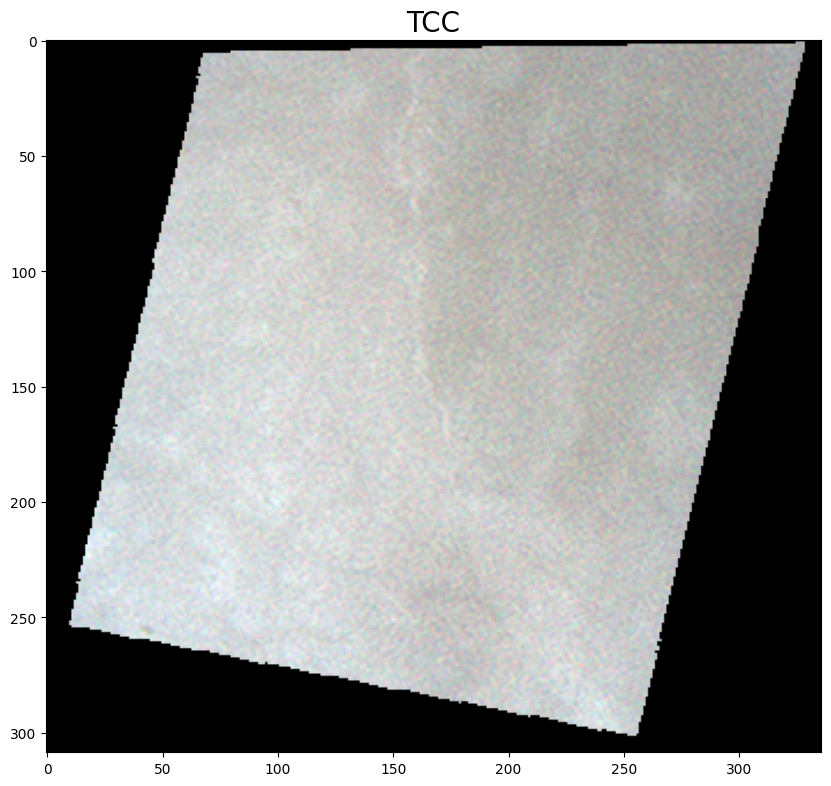

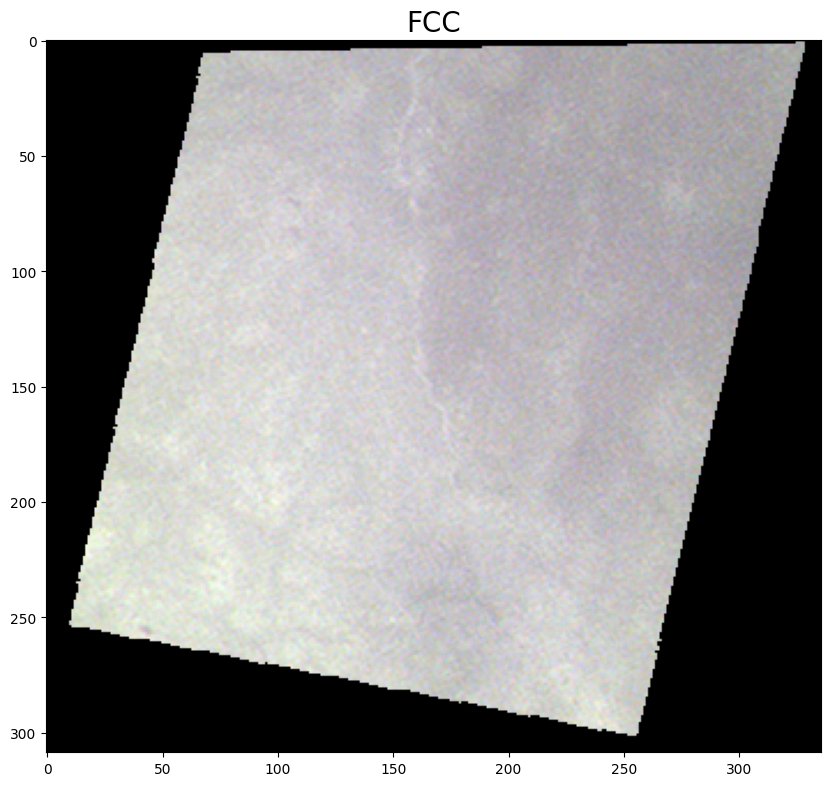

In [ ]:

B1n = norm(B1r)
B2n = norm(B2r)
B3n = norm(B3r)

RGB = np.dstack([B1n, B2n, B3n])
#RGB=RGB/7000
#RGB = np.clip(RGB*0.0000275-0.2, 0, 1)
plt.figure(figsize=(10,10))
plt.imshow(RGB)
plt.title('TCC', size= 20)
plt.show()

rgb= np.dstack([B2n,B3n,B1n])
#rgb=rgb/7000
#rgb = np.clip(rgb*0.0000275-0.2, 0, 1)
plt.figure(figsize=(10,10))
plt.imshow(rgb)
plt.title('FCC', size=20)
plt.show()

In [ ]:

print(RGB.shape)
print('*'*40)
print(rgb.shape)

(309, 336, 3)
****************************************
(309, 336, 3)


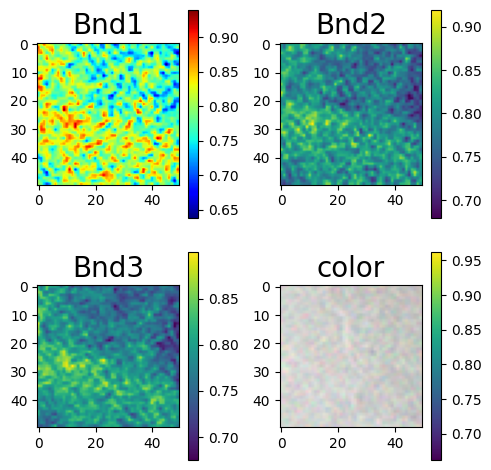

In [ ]:


RGB1= RGB[175:225, 175:225,0:1]
RGB1= np.clip(RGB1,0,1)
RGB1=RGB1.astype('float32')

RGB2= RGB[175:225, 175:225,1:2]
RGB2= np.clip(RGB2,0,1)
RGB2=RGB2.astype('float32')

RGB3= RGB[175:225, 175:225,2:3]
RGB3= np.clip(RGB3,0,1)
RGB3=RGB3.astype('float32')

plt.subplots(2,2,figsize=(5,5))

plt.subplot(2,2,1)
plt.title('Bnd1', size= 20)
plt.imshow(RGB1,cmap='jet')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(RGB2)
plt.title('Bnd2', size= 20)
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(RGB3)
plt.title('Bnd3', size= 20)
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(RGB[150:200,150:200,0:3])
plt.title('color',size=20)
plt.colorbar()

plt.tight_layout()
plt.show()

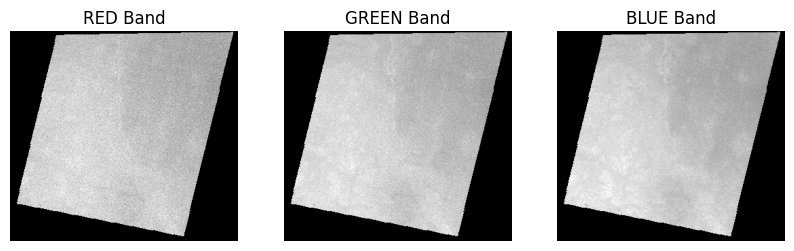

In [ ]:


plt.subplots(1,3,figsize=(10,10))

ax= plt.subplot(1,3,1)
plt.imshow(B1r, cmap='gray')
plt.title('RED Band')
plt.axis("off")

ax=plt.subplot(1,3,2)
plt.imshow(B2r, cmap='gray')
plt.title('GREEN Band')
plt.axis("off")

ax=plt.subplot(1,3,3)
plt.imshow(B3r, cmap='gray')
plt.title('BLUE Band')
plt.axis("off")

plt.show()

**bold text**#CLIPPING RASTER

In [ ]:

import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
from fiona.crs import from_epsg
import pycrs

In [ ]:


Input_file=r'/content/sample_data/IMS1_HYSI_GEO_101_30JUN2012_S2_RADIANCE_03_SPBIN.tif'
Out_file=r'/content/sample_data/Del_Clip_Ras/Del_mask.tif'

In [ ]:

Fp1=rasterio.open(Input_file)

In [ ]:


Fpt=Fp1.transform
print(Fpt)

| 0.01, 0.00, 76.34|
| 0.00,-0.01, 29.82|
| 0.00, 0.00, 1.00|


In [ ]:

#from affine import Affine

#Fp1=rasterio.Affine(0.01,0.00,76.34,0.00,-0.01,29.82)
help(rasterio.Affine)

#Affine(Fp1).rotation_angle
Fpt1= Fpt.rotation(10)
'''
fig,ax=plt.subplots(figsize=(10,10))
plt.imshow(Fpt1)
plt.show()'''
Fpt1.is_orthonormal

Help on class Affine in module affine:

class Affine(Affine)
 |  Affine(a: float, b: float, c: float, d: float, e: float, f: float, g: float = 0.0, h: float = 0.0, i: float = 1.0)
 |  
 |  Two dimensional affine transform for 2D linear mapping.
 |  
 |  Parameters
 |  ----------
 |  a, b, c, d, e, f : float
 |      Coefficients of an augmented affine transformation matrix
 |  
 |      | x' |   | a  b  c | | x |
 |      | y' | = | d  e  f | | y |
 |      | 1  |   | 0  0  1 | | 1 |
 |  
 |      `a`, `b`, and `c` are the elements of the first row of the
 |      matrix. `d`, `e`, and `f` are the elements of the second row.
 |  
 |  Attributes
 |  ----------
 |  a, b, c, d, e, f, g, h, i : float
 |      The coefficients of the 3x3 augmented affine transformation
 |      matrix
 |  
 |      | x' |   | a  b  c | | x |
 |      | y' | = | d  e  f | | y |
 |      | 1  |   | g  h  i | | 1 |
 |  
 |      `g`, `h`, and `i` are always 0, 0, and 1.
 |  
 |  The Affine package is derived from Casey Du

True

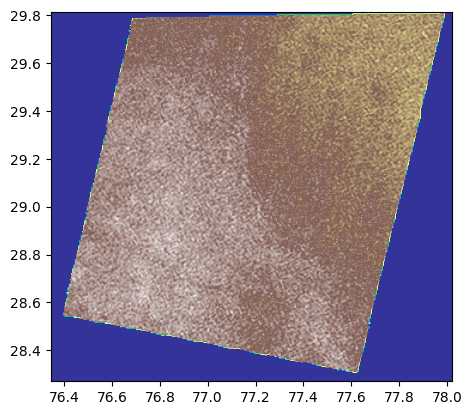

<Axes: >

In [ ]:

show((Fp1, 1), cmap='terrain')

In [ ]:

#wgs1984 cord
Minx, Miny, Maxx, Maxy= 28.80, 77.00, 28.90, 77.20
print(Minx, Miny,'\n',Maxx, Maxy)

28.8 77.0 
 28.9 77.2


In [ ]:


BBox= box(Minx, Miny, Maxx, Maxy)

In [ ]:

#    {     }
Df1= gpd.GeoDataFrame({'geometry':BBox},
                                               index=[0],
                                               crs= from_epsg(4326))

In [ ]:


Fp1.crs.data

{'init': 'epsg:4326'}

In [ ]:

Df1= Df1.to_crs(crs= Fp1.crs.data)
Df1

,geometry
0,"POLYGON ((28.90000 77.00000, 28.90000 77.20000..."


In [ ]:

def getFeat(Gdf):
       '''Function to parse features from
       GeoDataFrame in such a manner that they are ok'''
       import json
       return [json.loads(Gdf.to_json())['features'][0]['geometry']]

In [ ]:

Coordinates = getFeat(Df1)
print(Coordinates)

[{'type': 'Polygon', 'coordinates': [[[28.9, 77.0], [28.9, 77.2], [28.8, 77.2], [28.8, 77.0], [28.9, 77.0]]]}]


In [ ]:

out_fp, out_transform = mask(Fp1, shapes= Coordinates, invert=True)
print(out_transform)
print(out_fp.shape)

| 0.01, 0.00, 76.34|
| 0.00,-0.01, 29.82|
| 0.00, 0.00, 1.00|
(17, 309, 336)


In [ ]:

#Copy MetaData
Out_meta= Fp1.meta.copy()
print(Out_meta)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 336, 'height': 309, 'count': 17, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.005, 0.0, 76.34337695153009,
       0.0, -0.005, 29.81551082439224)}


In [ ]:

#Parse EPSG CODE
epsg_code= int(Fp1.crs.data['init'][5:])
print(epsg_code)

4326


In [ ]:

Out_meta.update({'driver':'GTiff',
                                  'height': out_fp.shape[1],
                                   'width': out_fp.shape[2],
                                   'transform':out_transform,
                                   'crs':pycrs.parse.from_epsg_code(epsg_code).to_proj4()
                                 })

In [ ]:

with rasterio.open(Out_file, 'w', **Out_meta) as dest:
         dest.write(out_fp)

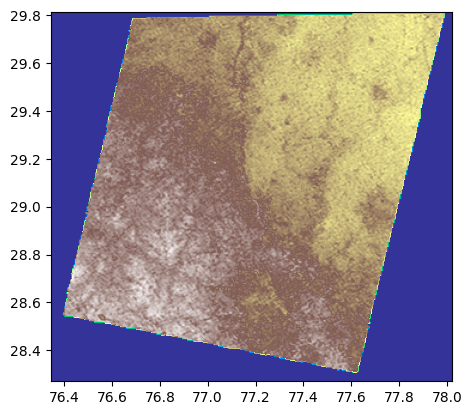

<Axes: >

In [ ]:

Clipped= rasterio.open(Out_file)
show((Clipped,5), cmap='terrain')

(3, 309, 336)
(309, 336, 3)


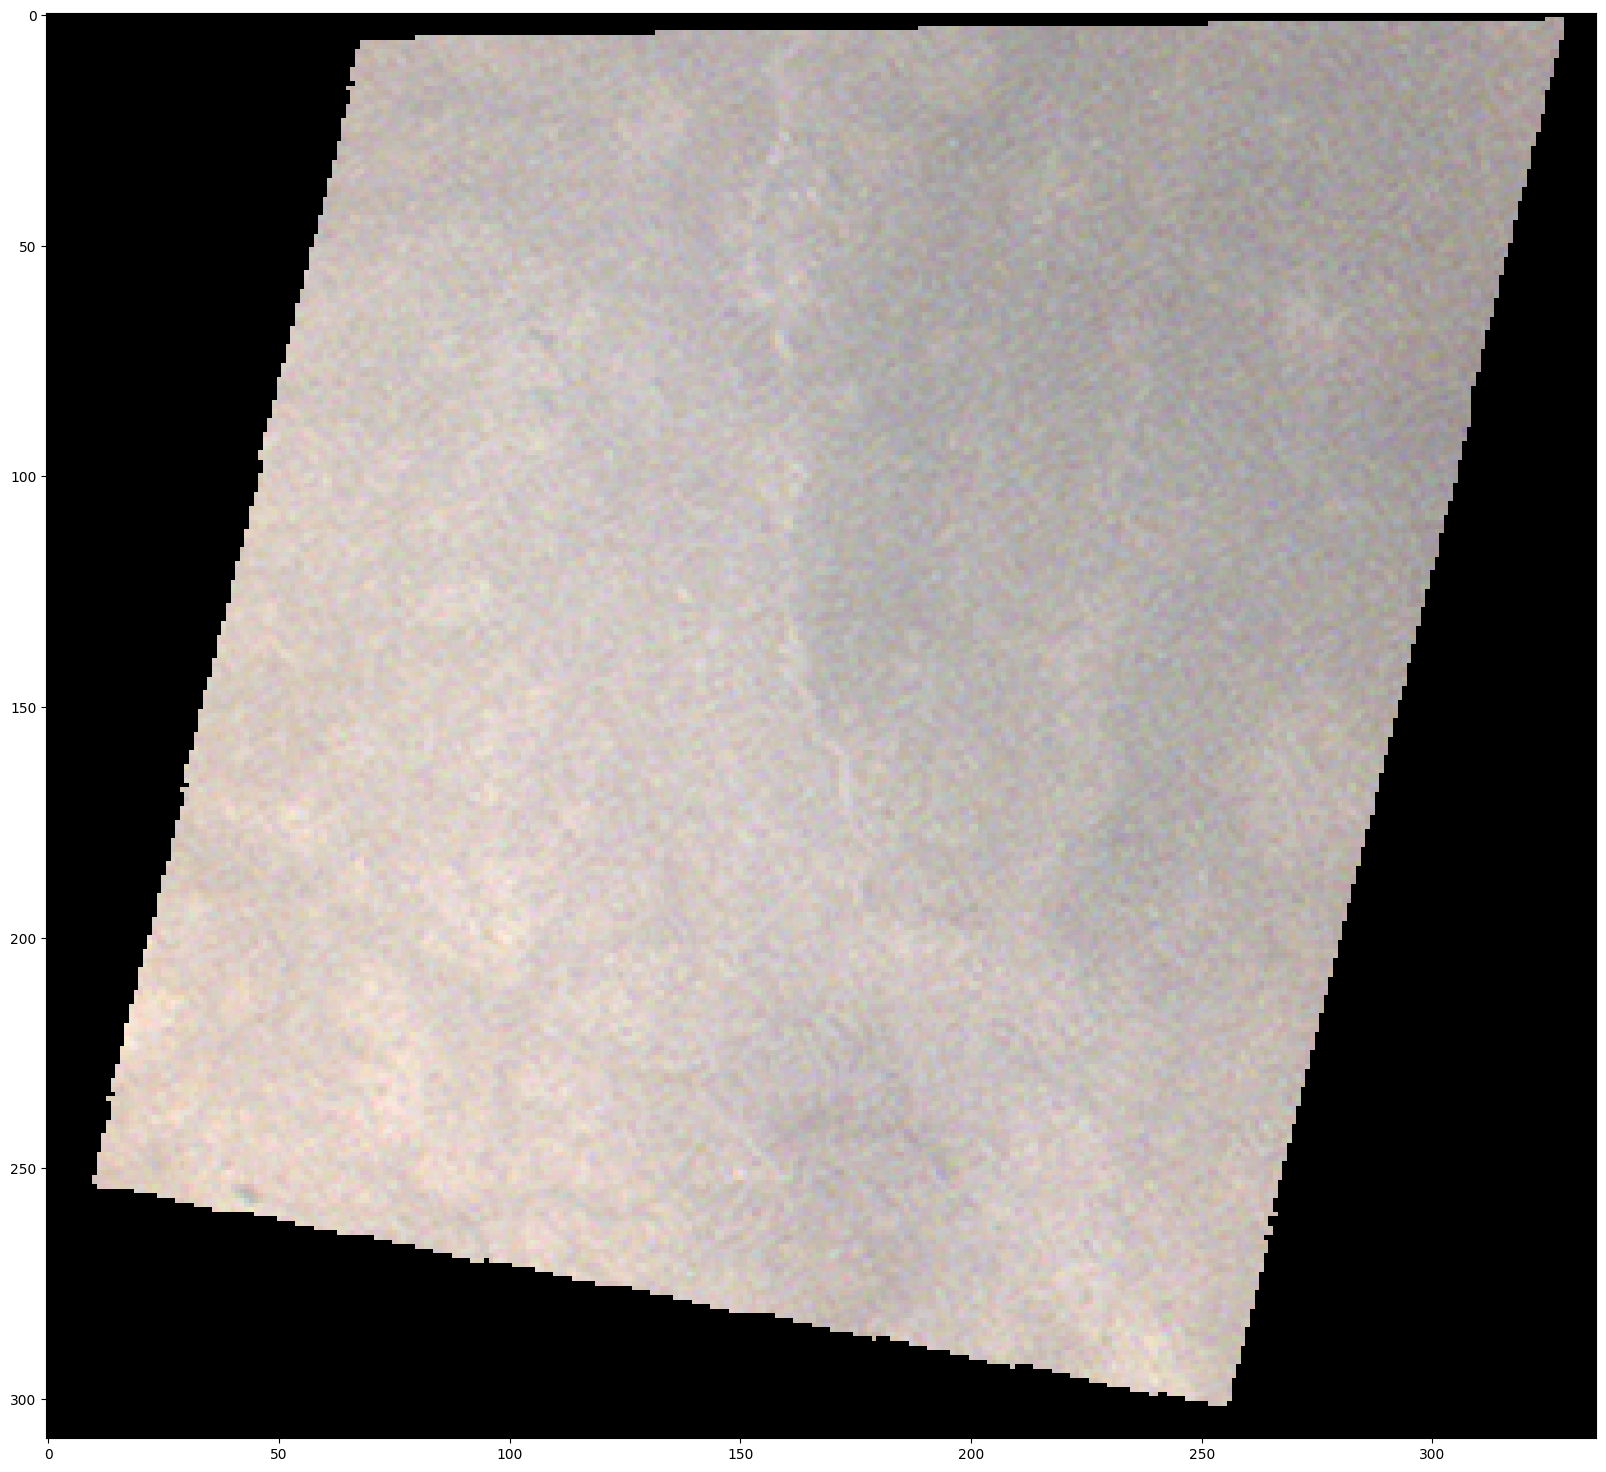

In [ ]:


from osgeo import gdal

Hai_clip='/content/sample_data/Del_Clip_Ras/Del_mask.tif'
Clip=gdal.Open(Hai_clip)

H= Clip.ReadAsArray(band_list=[3,2,1])
print(H.shape)
H=np.transpose(H, axes=[1,2,0])
print(H.shape)

def norm(arr):
       arr_min, arr_max = arr.min(), arr.max()
       return ((arr-arr_min)/(arr_max-arr_min))
Hnorm= norm(H)

plt.figure(figsize=(20,20))
plt.imshow(Hnorm)

#ROTATING A RASTER

In [ ]:
!pip install affine

In [ ]:


from affine import Affine
import numpy as np
from rasterio.warp import reproject, Resampling

In [ ]:

Inputfile='/content/sample_data/IMS1_HYSI_GEO_101_30JUN2012_S2_RADIANCE_03_SPBIN.tif'    #

In [ ]:


def rotate_raster(in_file,out_file, angle, shift_x=0, shift_y=0,adj_width=0, adj_height=0):
    """Rotate a raster image and save it to disk.
            in_file: path to input raster file
            out_file: path to output raster file
            angle: angle of rotation in degrees
            shift_x: shift in x direction
            shift_y: shift in y direction
            adj_width: adjust width of output raster
            adj_height: adjust height of output raster"""
            #content/sample_data/IMS1_HYSI_GEO_101_30JUN2012_S2_RADIANCE_03_SPBIN.tif'

    with rasterio.open(in_file, 'r') as src:
             # Get the old transform and crs
             print('hello')
             print(src)
             print('hai')
             src_transform = src.transform
             print(src_transform)
             crs = src.crs
             print('crs',crs)

             # Affine transformations for rotatioin and translation
             rotate = Affine.rotation(angle)
             trans_x = Affine.translation(shift_x,0)
             trans_y = Affine.translation(0, -shift_y)

             # Combine affine transformations
             dst_transform = src_transform * rotate * trans_x * trans_y

             # Get band data
             band = np.array(src.read(1))
             print('band', band)
             # Get the new shape
             y,x = band.shape
             dst_height = y + adj_height
             dst_width = x + adj_width

             dst_kwargs = src.meta.copy()

             dst_kwargs.update(
             {
                "transform": dst_transform,
                "height": dst_height,
                "width": dst_width,
                "nodata": 0,
               })

             print(dst_kwargs)


             Outputfile='/content/sample_data/Del_Clip_Ras/delhirotate.tif'
             # write to disk
             with rio.open(Outputfile, "w", **dst_kwargs) as dst:
                     # reproject to new CRS
                     reproject(source=band,
                                      destination=rio.band(dst, 1),
                                      src_transform=src_transform,
                                      src_crs=crs,
                                      dst_transform=dst_transform,
                                      dst_crs=crs,
                                      resampling=Resampling.nearest)

In [ ]:

Outputfile='/content/sample_data/Del_Clip_Ras/delhirotate.tif'

rotate_raster(Inputfile, Outputfile, 12, shift_x=30, shift_y=30)

hello
<open DatasetReader name='/content/sample_data/IMS1_HYSI_GEO_101_30JUN2012_S2_RADIANCE_03_SPBIN.tif' mode='r'>
hai
| 0.01, 0.00, 76.34|
| 0.00,-0.01, 29.82|
| 0.00, 0.00, 1.00|
crs EPSG:4326
band [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0, 'width': 336, 'height': 309, 'count': 17, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.004890738003669028, -0.0010395584540887968, 76.52128584526282,
       -0.0010395584540887968, -0.004890738003669028, 29.93104621087965)}


(3, 309, 336)
(309, 336, 3)


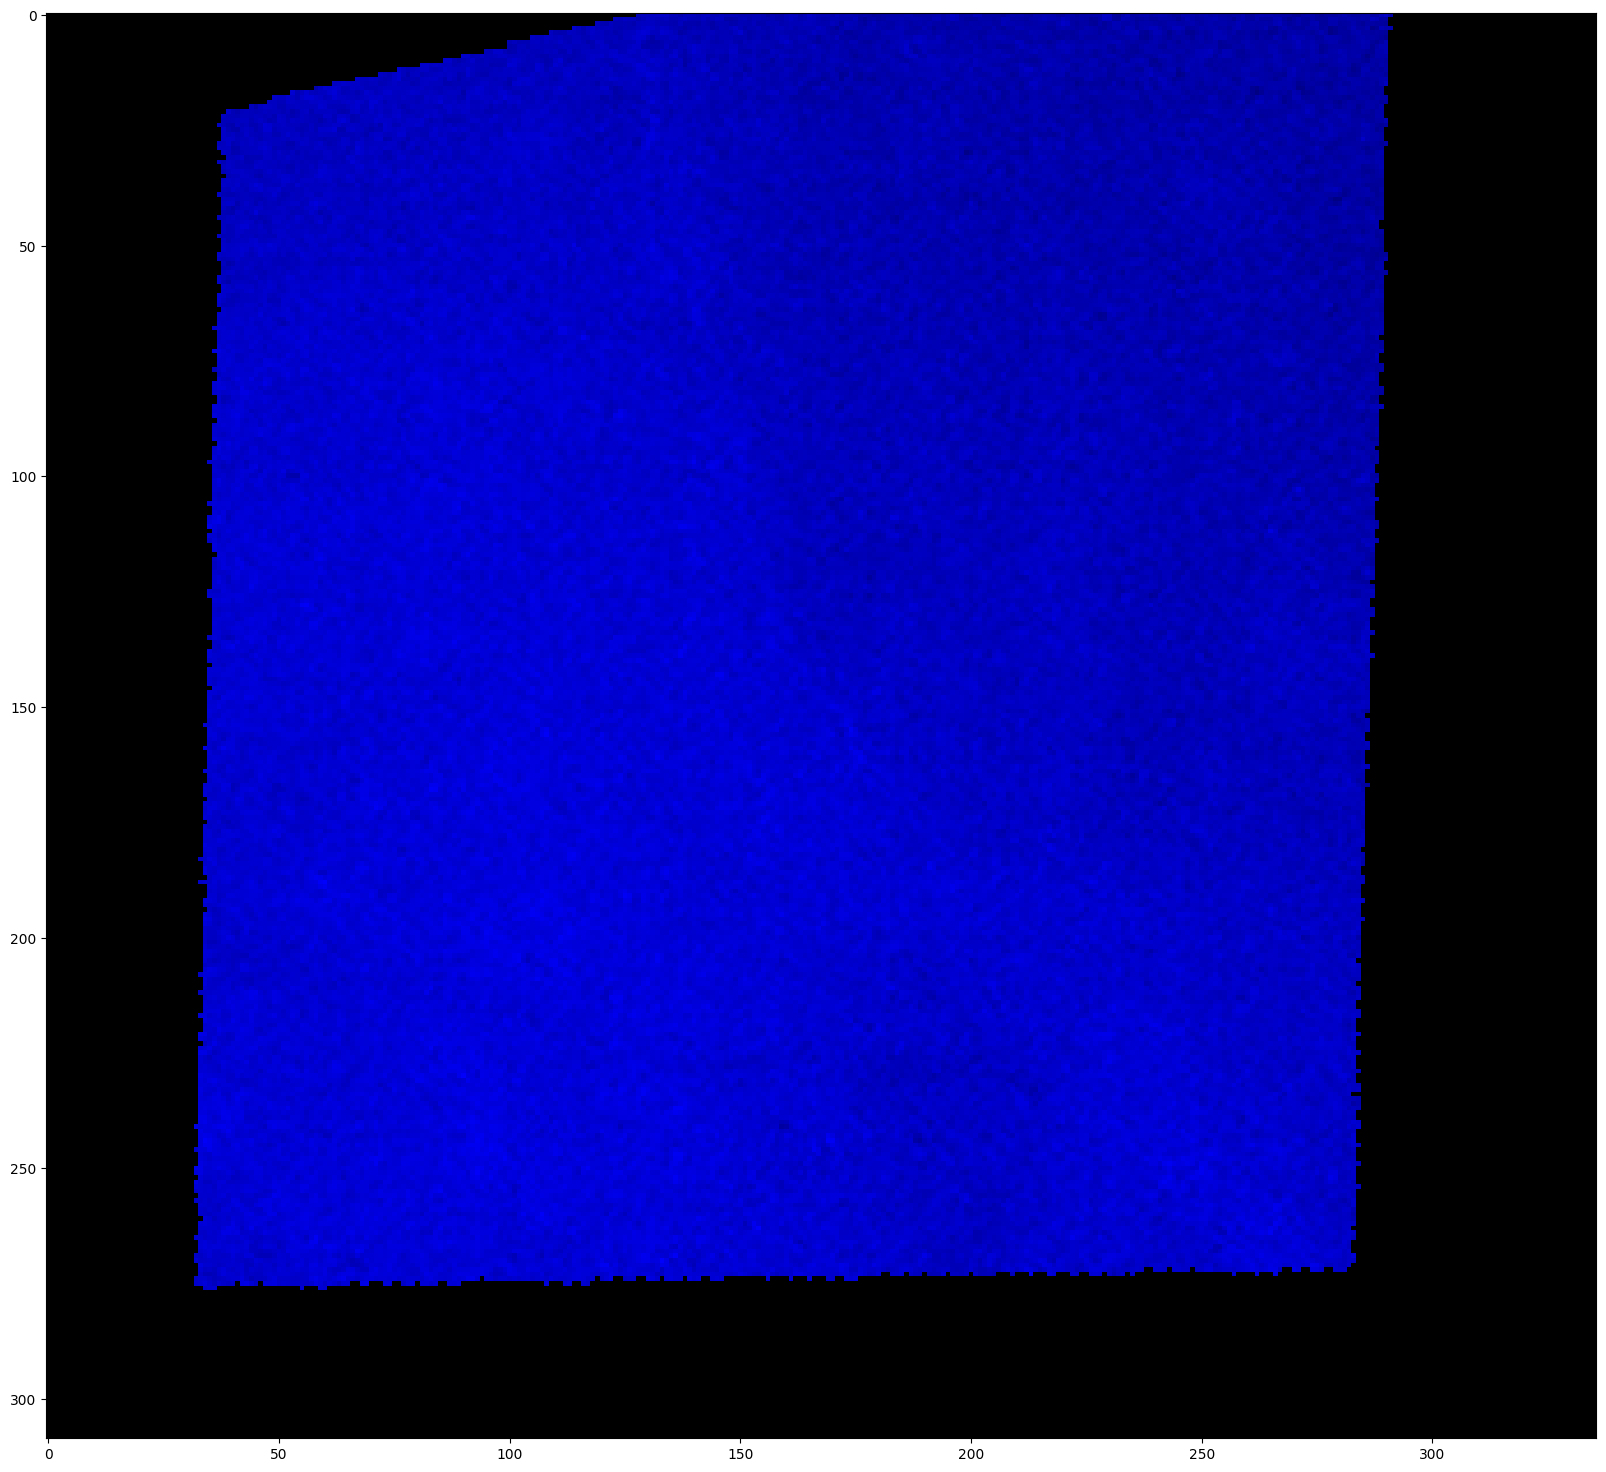

In [ ]:

O_file='/content/sample_data/Del_Clip_Ras/delhirotate.tif'

Dr=gdal.Open(O_file)
type(Dr)

H= Dr.ReadAsArray(band_list=[3,2,1])
print(H.shape)
H=np.transpose(H, axes=[1,2,0])
print(H.shape)

def norm(arr):
       arr_min, arr_max = arr.min(), arr.max()
       return ((arr-arr_min)/(arr_max-arr_min))
Hnorm= norm(H)

plt.figure(figsize=(20,20))
plt.imshow(Hnorm, cmap='hot')

#Affine Transformation

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from scipy import ndimage

(3, 309, 336)
(309, 336, 3)


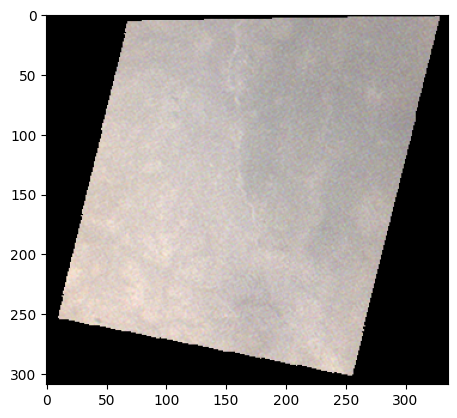

In [ ]:
'''
Mraster = gdal.Open('/content/sample_data/IMS1_HYSI_GEO_101_30JUN2012_S2_RADIANCE_03_SPBIN.tif')     #

B1 = Mraster.GetRasterBand(1)
B2 = Mraster.GetRasterBand(2)
B3 = Mraster.GetRasterBand(3)

b1=B1.ReadAsArray()
b2=B2.ReadAsArray()
b3=B3.ReadAsArray()

Rgb= np.dstack([b1,b2, b3])
'''
'''
Hai_clip='/content/sample_data/Del_Clip_Ras/Del_mask.tif'
Clip=gdal.Open(Hai_clip)

H= Clip.ReadAsArray(band_list=[3,2,1])
print(H.shape)
H=np.transpose(H, axes=[1,2,0])
print(H.shape)

def norm(arr):
       arr_min, arr_max = arr.min(), arr.max()
       return ((arr-arr_min)/(arr_max-arr_min))
Hnorm= norm(H)'''

Hai_clip1='/content/sample_data/IMS1_HYSI_GEO_101_30JUN2012_S2_RADIANCE_03_SPBIN.tif'
Clip1=gdal.Open(Hai_clip1)
#Hc1= Clip1.GetRasterBand(1)
#Hc1r= Hc1.ReadAsArray()


HC= Clip1.ReadAsArray(band_list=[3,2,1])
print(HC.shape)
HC=np.transpose(HC, axes=[1,2,0])
print(HC.shape)

def norm(arr):
       arr_min, arr_max = arr.min(), arr.max()
       return ((arr-arr_min)/(arr_max-arr_min))

Hnorm1= norm(HC)

plt.imshow(Hnorm1)
plt.show()

In [ ]:


def show(image, transformedImage):
       fig, ax = plt.subplots(1, 2, dpi=100)
       ax[0].set_title("Original Image")
       ax[0].imshow(image, cmap='gray')
       ax[0].set_xlabel('y axis')
       ax[0].set_ylabel('x axis')

       ax[1].set_title("Transformed Image")
       ax[1].imshow(transformedImage, cmap='gray')
       ax[1].set_xlabel('y axis')
       ax[1].set_ylabel('x axis')

       fig.tight_layout()
       plt.show()

In [ ]:
#TRANSLATION MATRIX

'''[0.01, 0.00, 76.30][0.00,-0.01, 29.82][ 0.00, 0.00, 1.00]'''

'[0.01, 0.00, 76.30][0.00,-0.01, 29.82][ 0.00, 0.00, 1.00]'

In [ ]:
#ROTATION MATRIX
#from math import sin, cos
#X= 0.005'''

wImage, hImage = 309, 336
print(wImage, hImage)
theta=(np.pi/18)

matTrans = np.array(np.array([[1, 0, wImage/2], [0, 1, hImage/2], [0,0,1]]))

matRotation= np.array(np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta),0], [0, 0, 1]]))

matTransInverse = np.array(np.array([[1, 0, -wImage/2], [0, 1, -hImage/2], [0, 0, 1]]))

matResultant=matTrans@matRotation@matTransInverse

print(matResultant)
'''TransformMatrix= np.array([[np.cos(theta), np.sin(theta), 0],[-np.sin(theta), np.cos(theta), 0],[0.00, 0.00, 1.00]])
TransformMatrix.astype('float64')
TransformMatrix'''
print('*'*50)
print(np.sin(np.pi/2))

309 336
[[  0.98480775  -0.17364818  31.52009601]
 [  0.17364818   0.98480775 -24.27634596]
 [  0.           0.           1.        ]]
**************************************************
1.0


In [ ]:

#NewTransformMatrix = norm(TransformMatrix)
NewTransformMatrix = norm(matResultant)

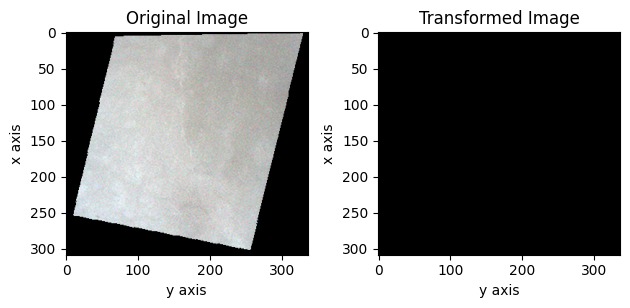

In [ ]:

Imtransform= ndimage.affine_transform(RGB, NewTransformMatrix)
show(RGB, Imtransform)

In [ ]:

'''tf.keras.preprocessing.image.apply_affine_transform(
    x,
    theta=0,
    tx=0,
    ty=0,
    shear=0,
    zx=1,
    zy=1,
    row_axis=1,
    col_axis=2,
    channel_axis=0,
    fill_mode='nearest',
    cval=0.0,
    order=1
)'''

"tf.keras.preprocessing.image.apply_affine_transform(\n    x,\n    theta=0,\n    tx=0,\n    ty=0,\n    shear=0,\n    zx=1,\n    zy=1,\n    row_axis=1,\n    col_axis=2,\n    channel_axis=0,\n    fill_mode='nearest',\n    cval=0.0,\n    order=1\n)"

In [ ]:


Op =rasterio.transform.array_bounds(309, 336, out_transform)
Op

(76.34337695153009, 28.27051082439224, 78.0233769515301, 29.81551082439224)

In [ ]:

img= rio.open('/content/sample_data/hopper2.tif')

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [ ]:
type(img)

rasterio.io.DatasetReader

In [ ]:

#from OpenCV import cv2
!pip install pystac

In [ ]:
!pip install landsatxplore

In [ ]:

from landsatxplore.api import API
import os

In [ ]:

# Your USGS  credentials
username = os.environ.get('------')
password = os.environ.get('------')

# Initialize a new API instance
api = API('----', '-----')

# Search for Landsat TM scenes
scenes = api.search(
    dataset='landsat_ot_c2_l2',
    latitude=28.704060,#-33.781963,
    longitude=77.102493,#18.522578,
    start_date='2020-01-01',
    end_date='2023-12-31'
)

# log out
api.logout()

import pandas as pd

# Create DataFrame from the scenes
df_scenes = pd.DataFrame(scenes)
df_scenes = df_scenes[['display_id','wrs_path', 'wrs_row','satellite','cloud_cover','acquisition_date']]
df_scenes = df_scenes[df_scenes.wrs_path == 146]#Delhi landsat path-row= 146-40
df_scenes.sort_values('acquisition_date', ascending=False, inplace=True)

In [ ]:

print(len(df_scenes)) #value: 55
#df_scenes.to_clipboard()
df_scenes.head()

50


,display_id,wrs_path,wrs_row,satellite,cloud_cover,acquisition_date
0,LC09_L2SP_146040_20231227_20231228_02_T1,146,40,9,68,2023-12-27
2,LC08_L2SP_146040_20231219_20240103_02_T1,146,40,8,2,2023-12-19
4,LC09_L2SP_146040_20231211_20231212_02_T1,146,40,9,1,2023-12-11
6,LC08_L2SP_146040_20231203_20231209_02_T1,146,40,8,1,2023-12-03
8,LC09_L2SP_146040_20231125_20231128_02_T1,146,40,9,2,2023-11-25


In [ ]:

df_scenes.to_csv('landsatipynbmay16.csv')

In [ ]:
df_scenes1= df_scenes[(df_scenes['cloud_cover']<10) & (df_scenes['satellite']==9)]

In [ ]:
len(df_scenes1)

14

In [ ]:
df_scenes1.head(15)

,display_id,wrs_path,wrs_row,satellite,cloud_cover,acquisition_date
4,LC09_L2SP_146040_20231211_20231212_02_T1,146,40,9,1,2023-12-11
8,LC09_L2SP_146040_20231125_20231128_02_T1,146,40,9,2,2023-11-25
12,LC09_L2SP_146040_20231109_20231129_02_T1,146,40,9,1,2023-11-09
16,LC09_L2SP_146040_20231024_20231025_02_T1,146,40,9,0,2023-10-24
20,LC09_L2SP_146040_20231008_20231009_02_T1,146,40,9,0,2023-10-08
40,LC09_L2SP_146040_20230720_20230802_02_T1,146,40,9,9,2023-07-20
63,LC09_L2SP_146040_20230415_20230417_02_T1,146,40,9,0,2023-04-15
67,LC09_L2SP_146040_20230330_20230401_02_T1,146,40,9,7,2023-03-30
71,LC09_L2SP_146040_20230314_20230316_02_T1,146,40,9,0,2023-03-14
75,LC09_L2SP_146040_20230226_20230308_02_T1,146,40,9,0,2023-02-26


In [ ]:
df_scenes1.to_csv('landsatcloudcoverlt10Sat9.csv')